# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [204]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)    
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [205]:
url = "http://api.openweathermap.org/data/2.5/weather?"
Lat = []
Lon = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_speed = []
Country = []
Date = []

city_delete = []

for i in range(len(cities)):
    pprint(f" Processing Record {i+1} of Set 1 |: {cities[i]}")
    query_url = url + "appid=" + weather_api_key + "&q=" + cities[i] + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    #If statement accounts for city not found
    if weather_json['cod'] == 200:
        Lat.append(weather_json['coord']['lat'])
        Lon.append(weather_json['coord']['lon'])
        Max_Temp.append(weather_json['main']['temp_max'])
        Humidity.append(weather_json['main']['humidity'])
        Cloudiness.append(weather_json['clouds']['all'])
        Wind_speed.append(weather_json['wind']['speed'])
        Country.append(weather_json['sys']['country'])
        Date.append(weather_json['dt'])
    else:
        print('City not found. Skipping...')
        
        #capture list of missing cities
        city_delete.append(cities[i])
        
#remove the missing cities...        
for i in range(len(city_delete)):
    cities.remove(city_delete[i])    


' Processing Record 1 of Set 1 |: vaini'
' Processing Record 2 of Set 1 |: kodiak'
' Processing Record 3 of Set 1 |: jamestown'
' Processing Record 4 of Set 1 |: tasiilaq'
' Processing Record 5 of Set 1 |: marcona'
City not found. Skipping...
' Processing Record 6 of Set 1 |: ushuaia'
' Processing Record 7 of Set 1 |: albany'
' Processing Record 8 of Set 1 |: taolanaro'
City not found. Skipping...
' Processing Record 9 of Set 1 |: barentsburg'
City not found. Skipping...
' Processing Record 10 of Set 1 |: tiksi'
' Processing Record 11 of Set 1 |: taltal'
' Processing Record 12 of Set 1 |: khorramabad'
' Processing Record 13 of Set 1 |: russell'
' Processing Record 14 of Set 1 |: attawapiskat'
City not found. Skipping...
' Processing Record 15 of Set 1 |: hamilton'
' Processing Record 16 of Set 1 |: bredasdorp'
' Processing Record 17 of Set 1 |: hermanus'
' Processing Record 18 of Set 1 |: mataura'
' Processing Record 19 of Set 1 |: butaritari'
' Processing Record 20 of Set 1 |: santa l

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [206]:
weather_dict = {
    "city": cities,
    "Lat": Lat,
    "Lng": Lon,
    "Max_Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind_Speed": Wind_speed,
    "Country": Country,
    "Date": Date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('weather_data.csv',index=False)
weather_data

,city,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,vaini,-21.2000,-175.2000,82.40,83,75,9.22,TO,1612670002
1,kodiak,57.7900,-152.4072,33.80,60,1,5.75,US,1612670002
2,jamestown,42.0970,-79.2353,15.80,53,1,6.91,US,1612669912
3,tasiilaq,65.6145,-37.6368,33.80,51,50,21.85,GL,1612669433
4,ushuaia,-54.8000,-68.3000,48.20,76,75,12.66,AR,1612670002
...,...,...,...,...,...,...,...,...,...
539,broken hill,-31.9500,141.4333,75.20,41,0,16.11,AU,1612669814
540,porto novo,6.4965,2.6036,84.20,84,40,12.66,BJ,1612669535
541,asosa,10.0667,34.5333,55.56,33,26,6.89,ET,1612669826
542,harlingen,26.1906,-97.6961,61.00,100,1,6.91,US,1612669947


In [207]:
weather_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.164904,13.346497,49.583824,75.527574,49.943015,8.542721,1.612670e+09
std,33.765392,90.174722,32.175850,18.538377,40.782025,6.117229,1.806623e+02
min,-54.800000,-179.166700,-42.210000,11.000000,0.000000,0.560000,1.612669e+09
25%,-9.818900,-65.243225,30.935000,67.000000,1.000000,3.685000,1.612670e+09
50%,22.622500,18.348450,60.775000,81.000000,49.500000,6.910000,1.612670e+09
75%,47.854625,83.579200,75.200000,89.000000,90.000000,11.870000,1.612670e+09
max,78.218600,179.316700,91.990000,100.000000,100.000000,34.520000,1.612670e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [208]:
weather_data = weather_data[weather_data['Humidity'] <= 100] 
weather_data.head(10)

,city,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,vaini,-21.2000,-175.2000,82.40,83,75,9.22,TO,1612670002
1,kodiak,57.7900,-152.4072,33.80,60,1,5.75,US,1612670002
2,jamestown,42.0970,-79.2353,15.80,53,1,6.91,US,1612669912
3,tasiilaq,65.6145,-37.6368,33.80,51,50,21.85,GL,1612669433
4,ushuaia,-54.8000,-68.3000,48.20,76,75,12.66,AR,1612670002
5,albany,42.6001,-73.9662,21.99,51,7,1.77,US,1612669950
6,tiksi,71.6872,128.8694,-25.40,85,100,6.06,RU,1612669983
7,taltal,-25.4000,-70.4833,63.46,76,5,2.35,CL,1612669538
8,khorramabad,33.4878,48.3558,42.49,84,100,3.42,IR,1612670003
9,russell,32.3502,-85.1999,42.80,87,90,5.75,US,1612670003


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

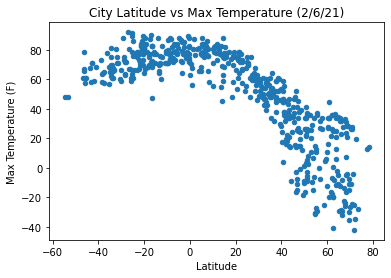

This chart is analyzing the relationships between Temperature and Latitude. It clearly indicates that temperature declines, on average, the further you move from the equator.
The colder plots, further from the equator in the Northern Hemisphere are indicative of greater human populations closer to the north pole than the south pole


In [228]:
weather_data.plot(kind='scatter',x='Lat',y='Max_Temp',title='City Latitude vs Max Temperature (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig('Lat_vs_Temp.png')
plt.show()
print('This chart is analyzing the relationships between Temperature and Latitude. It clearly indicates that temperature declines, on average, the further you move from the equator.')
print('The colder plots, further from the equator in the Northern Hemisphere are indicative of greater human populations closer to the north pole than the south pole')

## Latitude vs. Humidity Plot

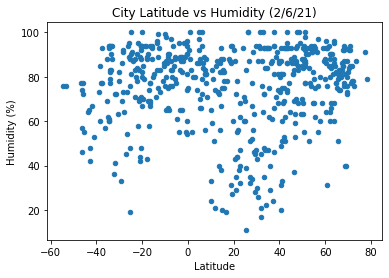

This chart is analyzing the relationships between Humidity and Latitude. Without a linear regression line, there is not an obvious relationship


In [227]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity',title='City Latitude vs Humidity (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Lat_vs_Humidity.png')
plt.show()
print('This chart is analyzing the relationships between Humidity and Latitude. Without a linear regression line, there is not an obvious relationship')

## Latitude vs. Cloudiness Plot

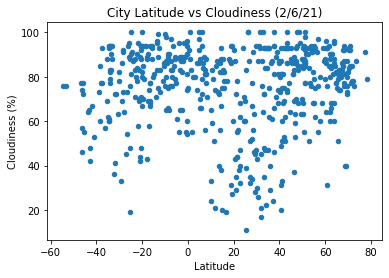

This chart is analyzing the relationships between Cloudiness and Latitude. It clearly indicates that temperature declines, on average, the further you move from the equator


In [229]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity',title='City Latitude vs Cloudiness (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Lat_vs_Cloudiness.png')
plt.show()
print('This chart is analyzing the relationships between Cloudiness and Latitude. It clearly indicates that temperature declines, on average, the further you move from the equator')

## Latitude vs. Wind Speed Plot

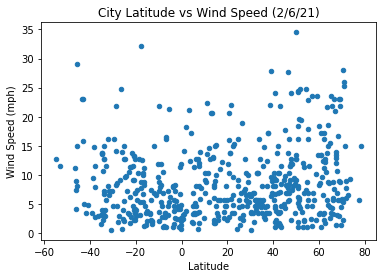

This chart is analyzing the relationships between Wind Speed and Latitude. It clearly indicates that temperature declines, on average, the further you move from the equator


In [230]:
weather_data.plot(kind='scatter',x='Lat',y='Wind_Speed',title='City Latitude vs Wind Speed (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Lat_vs_Wind_Speed.png')
plt.show()
print('This chart is analyzing the relationships between Wind Speed and Latitude. It clearly indicates that temperature declines, on average, the further you move from the equator')

## Linear Regression

In [216]:
#create df for each hemisphere
North_data = weather_data[weather_data['Lat'] >= 0] 
South_data = weather_data[weather_data['Lat'] <= 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

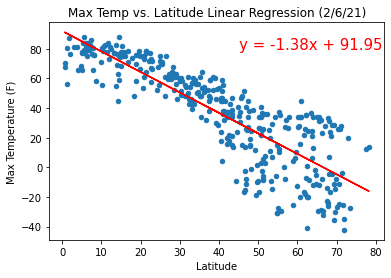

In [231]:
North_data.plot(kind='scatter',x='Lat',y='Max_Temp',title='Max Temp vs. Latitude Linear Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_data['Lat'], North_data['Max_Temp'])
regress_values = North_data['Lat'] * slope + intercept
plt.plot(North_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,80),fontsize=15,color="red")

plt.savefig('North_Lin_Reg-Temp_vs_Lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

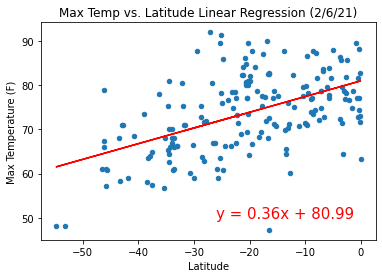

The above 2 linear regressions very clearly show that temperatures decline, on average, as you move away from the Equator (latitude = 0)


In [232]:
South_data.plot(kind='scatter',x='Lat',y='Max_Temp',title='Max Temp vs. Latitude Linear Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_data['Lat'], South_data['Max_Temp'])
regress_values = South_data['Lat'] * slope + intercept
plt.plot(South_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-26,50),fontsize=15,color="red")

plt.savefig('South_Lin_Reg-Temp_vs_Lat.png')
plt.show()
print('The above 2 linear regressions very clearly show that temperatures decline, on average, as you move away from the Equator (latitude = 0)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

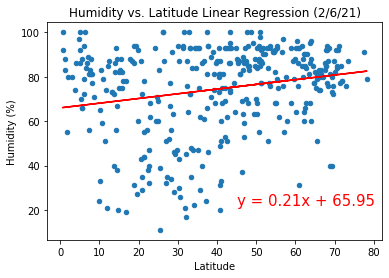

In [233]:
North_data.plot(kind='scatter',x='Lat',y='Humidity',title='Humidity vs. Latitude Linear Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_data['Lat'], North_data['Humidity'])
regress_values = North_data['Lat'] * slope + intercept
plt.plot(North_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,22),fontsize=15,color="red")

plt.savefig('North_Lin_Reg-Humidity_vs_Lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

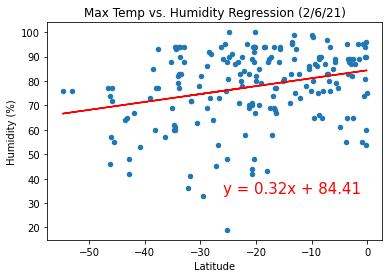

The above 2 linear regressions plot humidity by latitude. In both hemispheres, Humidity seems to increase as you go North. This could be explained by where landmasses are and/or ocean currents


In [234]:
South_data.plot(kind='scatter',x='Lat',y='Humidity',title='Max Temp vs. Humidity Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_data['Lat'], South_data['Humidity'])
regress_values = South_data['Lat'] * slope + intercept
plt.plot(South_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-26,34),fontsize=15,color="red")

plt.savefig('South_Lin_Reg-Humidity_vs_Lat.png')
plt.show()

print('The above 2 linear regressions plot humidity by latitude. In both hemispheres, Humidity seems to increase as you go North. This could be explained by where landmasses are and/or ocean currents')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

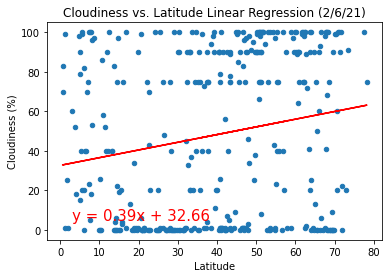

In [235]:
North_data.plot(kind='scatter',x='Lat',y='Cloudiness',title='Cloudiness vs. Latitude Linear Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_data['Lat'], North_data['Cloudiness'])
regress_values = North_data['Lat'] * slope + intercept
plt.plot(North_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(3,5),fontsize=15,color="red")

plt.savefig('North_Lin_Reg-Cloudiness_vs_Lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

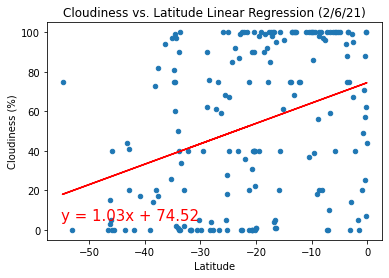

The above 2 linear regressions show Cloudiness by latitude. Not suprisingly, cloudiness seems to correlate with humidity


In [236]:
South_data.plot(kind='scatter',x='Lat',y='Cloudiness',title='Cloudiness vs. Latitude Linear Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_data['Lat'], South_data['Cloudiness'])
regress_values = South_data['Lat'] * slope + intercept
plt.plot(South_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,5),fontsize=15,color="red")

plt.savefig('South_Lin_Reg-Cloudiness_vs_Lat.png')
plt.show()

print('The above 2 linear regressions show Cloudiness by latitude. Not suprisingly, cloudiness seems to correlate with humidity')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

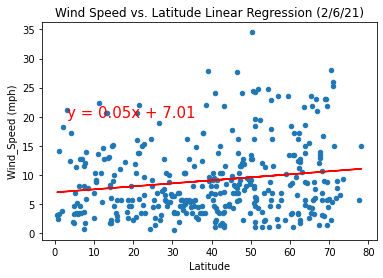

In [237]:
North_data.plot(kind='scatter',x='Lat',y='Wind_Speed',title='Wind Speed vs. Latitude Linear Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_data['Lat'], North_data['Wind_Speed'])
regress_values = North_data['Lat'] * slope + intercept
plt.plot(North_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(3,20),fontsize=15,color="red")

plt.savefig('North_Lin_Reg-Wind_Speed_vs_Lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

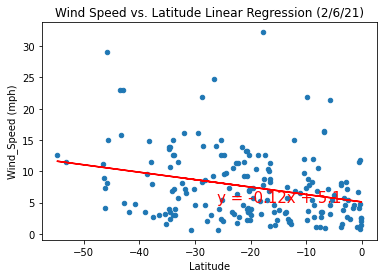

The above 2 linear regressions relate Wind Speed to Latitude. They indicate that wind speed increases as you move away from the equator (latitude=0) 


In [238]:
South_data.plot(kind='scatter',x='Lat',y='Wind_Speed',title='Wind Speed vs. Latitude Linear Regression (2/6/21)')
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_data['Lat'], South_data['Wind_Speed'])
regress_values = South_data['Lat'] * slope + intercept
plt.plot(South_data['Lat'],regress_values,'r-')
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-26,5),fontsize=15,color="red")

plt.savefig('South_Lin_Reg-Wind_Speed_vs_Lat.png')
plt.show()

print('The above 2 linear regressions relate Wind Speed to Latitude. They indicate that wind speed increases as you move away from the equator (latitude=0) ')